In [149]:
# Importing dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [150]:
# Create files path
schools_path = Path('../PyCitySchools/Resources/schools_complete.csv')
students_path = Path('../PyCitySchools/Resources/students_complete.csv')

# Read the data
schools_df = pd.read_csv(schools_path)
students_df = pd.read_csv(students_path)

In [151]:
# Display the schools df
schools_df.head(1)

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635


In [152]:
# Display the students df
students_df.head(1)

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79


In [153]:
# Merge the 2 DFs
merged_df = pd.merge(schools_df,students_df,on='school_name')
# Display the merged df
merged_df.head(1)

,School ID,school_name,type,size,budget,Student ID,student_name,gender,grade,reading_score,math_score
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79


In [154]:
# Check for NAs
merged_df.isna().sum()

School ID        0
school_name      0
type             0
size             0
budget           0
Student ID       0
student_name     0
gender           0
grade            0
reading_score    0
math_score       0
dtype: int64

In [155]:
# Calculate the total schools number 
total_schools = schools_df['school_name'].count()
print(f'The total school numbers is : {total_schools}')

The total school numbers is : 15


In [156]:
# Calculate the total number of students
total_students = merged_df['student_name'].count()
print(f'The total number of students is {total_students}')

The total number of students is 39170


In [157]:
# Calculate the total budget
total_budget = schools_df['budget'].sum()
print(f'The total budget of all schools is {total_budget}')

The total budget of all schools is 24649428


In [158]:
# Calculate the average (mean) Math score
avg_math_for_all_schools = round(merged_df['math_score'].mean(),2)
print(f'The average Math score for all schools is {avg_math_for_all_schools}')

The average Math score for all schools is 78.99


In [159]:
# Calculate the average (mean) Reading score
avg_reading_for_all_schools = round(merged_df['reading_score'].mean(),2)
print(f'The average Math score for all schools is {avg_reading_for_all_schools}')


The average Math score for all schools is 81.88


In [160]:
# Calculate the percentage of students who passed Math (Math scores greather than or equal to 70)
students_who_passed_math = merged_df[merged_df['math_score']>=70]['student_name'].count()
perc_students_who_passed_math = students_who_passed_math/total_students*100
print(f'The perentage of all students who passed Math is {round(perc_students_who_passed_math,2)} %')

The perentage of all students who passed Math is 74.98 %


In [161]:
# Calculate the percentage of students who passed Reading (Reading scores greather than or equal to 70)
students_who_passed_reading = merged_df[merged_df['reading_score']>=70]['student_name'].count()
perc_students_who_passed_reading = students_who_passed_reading/total_students*100
print(f'The perentage of all students who passed Reading is {round(perc_students_who_passed_reading,2)} %')

The perentage of all students who passed Reading is 85.81 %


In [162]:
# Calculate the percentage of total students who passed Math and Reading together
per_of_students_who_passed_math_and_reading = merged_df[(merged_df['reading_score']>=70)&(merged_df['math_score']>=70)]\
    .count()['student_name']/total_students*100
print(f'The percentage of students who passed Math and Reading is {round(per_of_students_who_passed_math_and_reading,2)} %')

The percentage of students who passed Math and Reading is 65.17 %


In [163]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary = pd.DataFrame({'Total Students':total_students,'Total Budget':total_budget,'Average Math Score':avg_math_for_all_schools,\
            'Average Reading Score':avg_reading_for_all_schools,'% Passing Math':perc_students_who_passed_math,\
            '% Passing Reading':perc_students_who_passed_reading,'% Overall Passing':per_of_students_who_passed_math_and_reading },index=[0])
district_summary

,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,39170,24649428,78.99,81.88,74.980853,85.805463,65.172326


In [164]:
# Format the total budget and the % columns
district_summary['Total Budget'] = district_summary['Total Budget'].map('{:.2f}$'.format)
district_summary['% Passing Math'] = district_summary['% Passing Math'].map('{:.2f}%'.format)
district_summary['% Passing Reading'] = district_summary['% Passing Reading'].map('{:.2f}%'.format)
district_summary['% Overall Passing'] = district_summary['% Overall Passing'].map('{:.2f}%'.format)
district_summary

,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,39170,24649428.00$,78.99,81.88,74.98%,85.81%,65.17%


In [165]:
# Calculate the total student count per school from school_data
total_student_count_per_school = merged_df.groupby('school_name')['student_name'].count()
total_student_count_per_school

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: student_name, dtype: int64

In [166]:
# Calculate the total school budget and per capita spending per school from school_data
total_budget_per_school = merged_df.groupby('school_name')['budget'].mean()
total_budget_per_school_per_student = total_budget_per_school/total_student_count_per_school
total_budget_per_school_per_student

school_name
Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0
Wright High School       583.0
dtype: float64

In [167]:
# Calculate the average Math score per school from school_data_complete
avg_math_score_per_school = round(merged_df.groupby('school_name')['math_score'].mean(),2)
avg_math_score_per_school

school_name
Bailey High School       77.05
Cabrera High School      83.06
Figueroa High School     76.71
Ford High School         77.10
Griffin High School      83.35
Hernandez High School    77.29
Holden High School       83.80
Huang High School        76.63
Johnson High School      77.07
Pena High School         83.84
Rodriguez High School    76.84
Shelton High School      83.36
Thomas High School       83.42
Wilson High School       83.27
Wright High School       83.68
Name: math_score, dtype: float64

In [168]:
# Calculate the average Reading score per school from school_data_complete
avg_reading_score_per_school = round(merged_df.groupby('school_name')['reading_score'].mean(),2)
avg_reading_score_per_school

school_name
Bailey High School       81.03
Cabrera High School      83.98
Figueroa High School     81.16
Ford High School         80.75
Griffin High School      83.82
Hernandez High School    80.93
Holden High School       83.81
Huang High School        81.18
Johnson High School      80.97
Pena High School         84.04
Rodriguez High School    80.74
Shelton High School      83.73
Thomas High School       83.85
Wilson High School       83.99
Wright High School       83.96
Name: reading_score, dtype: float64

In [169]:
# Calculate the number of students per school with math scores of 70 or higher from school_data_complete
students_per_school_who_passed_math = merged_df.loc[merged_df['math_score']>=70].groupby('school_name')['student_name'].count()
students_per_school_who_passed_math

school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
Name: student_name, dtype: int64

In [170]:
# Calculate the number of students per school with Reading scores of 70 or higher from school_data_complete
students_per_school_who_passed_reading = merged_df.loc[merged_df['reading_score']>=70].groupby('school_name')['student_name'].count()
students_per_school_who_passed_reading

school_name
Bailey High School       4077
Cabrera High School      1803
Figueroa High School     2381
Ford High School         2172
Griffin High School      1426
Hernandez High School    3748
Holden High School        411
Huang High School        2372
Johnson High School      3867
Pena High School          923
Rodriguez High School    3208
Shelton High School      1688
Thomas High School       1591
Wilson High School       2204
Wright High School       1739
Name: student_name, dtype: int64

In [171]:
# Calculate the total number of students per school who passed Math and Reading
studends_per_school_who_passed_math_and_reading = merged_df.loc[(merged_df['math_score']>=70)&(merged_df['reading_score']>=70)]\
                                                                                .groupby('school_name').count()['student_name']
studends_per_school_who_passed_math_and_reading

school_name
Bailey High School       2719
Cabrera High School      1697
Figueroa High School     1569
Ford High School         1487
Griffin High School      1330
Hernandez High School    2481
Holden High School        381
Huang High School        1561
Johnson High School      2549
Pena High School          871
Rodriguez High School    2119
Shelton High School      1583
Thomas High School       1487
Wilson High School       2068
Wright High School       1626
Name: student_name, dtype: int64

In [172]:
# Calculate the passing rate for students per school who passed Math, Reading and both
rate_students_passed_math_per_school = students_per_school_who_passed_math/total_student_count_per_school*100
rate_students_passed_reading_per_school = students_per_school_who_passed_reading/total_student_count_per_school*100
rate_students_passed_reading_and_math_per_school = studends_per_school_who_passed_math_and_reading/total_student_count_per_school*100


In [173]:
rate_students_passed_math_per_school

school_name
Bailey High School       66.680064
Cabrera High School      94.133477
Figueroa High School     65.988471
Ford High School         68.309602
Griffin High School      93.392371
Hernandez High School    66.752967
Holden High School       92.505855
Huang High School        65.683922
Johnson High School      66.057551
Pena High School         94.594595
Rodriguez High School    66.366592
Shelton High School      93.867121
Thomas High School       93.272171
Wilson High School       93.867718
Wright High School       93.333333
Name: student_name, dtype: float64

In [174]:
rate_students_passed_reading_per_school

school_name
Bailey High School       81.933280
Cabrera High School      97.039828
Figueroa High School     80.739234
Ford High School         79.299014
Griffin High School      97.138965
Hernandez High School    80.862999
Holden High School       96.252927
Huang High School        81.316421
Johnson High School      81.222432
Pena High School         95.945946
Rodriguez High School    80.220055
Shelton High School      95.854628
Thomas High School       97.308869
Wilson High School       96.539641
Wright High School       96.611111
Name: student_name, dtype: float64

In [175]:
rate_students_passed_reading_and_math_per_school

school_name
Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
Name: student_name, dtype: float64

In [176]:
# Get the school type to include it in our new df
school_type = schools_df[['school_name','type']]

In [177]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
per_school_summary = pd.DataFrame({'Total students':total_student_count_per_school,'Total budget':total_budget_per_school_per_student,\
'Students who passed Math':students_per_school_who_passed_math,'Students who passed Reading':students_per_school_who_passed_reading,\
'Students who passed Math and Reading':studends_per_school_who_passed_math_and_reading,\
'% Students who passed Math':rate_students_passed_math_per_school,'% Students who passed Reading': rate_students_passed_reading_per_school,\
'% Students who passed Math and Reading':rate_students_passed_reading_and_math_per_school})

In [178]:
# Displacy the df
per_school_summary = pd.merge(per_school_summary,school_type,on='school_name')
per_school_summary.set_index('school_name').head(1)

,Total students,Total budget,Students who passed Math,Students who passed Reading,Students who passed Math and Reading,% Students who passed Math,% Students who passed Reading,% Students who passed Math and Reading,type
school_name,,,,,,,,,
Bailey High School,4976,628.0,3318,4077,2719,66.680064,81.93328,54.642283,District


In [179]:
# Top 2 schools
top_schools = per_school_summary.sort_values(by='% Students who passed Math and Reading',ascending=False)
top_schools.head(2)

,school_name,Total students,Total budget,Students who passed Math,Students who passed Reading,Students who passed Math and Reading,% Students who passed Math,% Students who passed Reading,% Students who passed Math and Reading,type
1,Cabrera High School,1858,582.0,1749,1803,1697,94.133477,97.039828,91.334769,Charter
12,Thomas High School,1635,638.0,1525,1591,1487,93.272171,97.308869,90.948012,Charter


In [180]:
# last 2 schools
bottom_schools = per_school_summary.sort_values(by='% Students who passed Math and Reading',ascending=True)
bottom_schools.head(2)

,school_name,Total students,Total budget,Students who passed Math,Students who passed Reading,Students who passed Math and Reading,% Students who passed Math,% Students who passed Reading,% Students who passed Math and Reading,type
10,Rodriguez High School,3999,637.0,2654,3208,2119,66.366592,80.220055,52.988247,District
2,Figueroa High School,2949,639.0,1946,2381,1569,65.988471,80.739234,53.204476,District


In [181]:
# Calculate the Avg for Math and Reading for each of the grades 9,10,11 and 12
#For Math
avg_math_for_grade_9 = merged_df[merged_df['grade']=='9th'].groupby('school_name')['math_score'].mean()
avg_math_for_grade_10 = merged_df[merged_df['grade']=='10th'].groupby('school_name')['math_score'].mean()
avg_math_for_grade_11 = merged_df[merged_df['grade']=='11th'].groupby('school_name')['math_score'].mean()
avg_math_for_grade_12 = merged_df[merged_df['grade']=='12th'].groupby('school_name')['math_score'].mean()
# For Reading
avg_reading_for_grade_9 = merged_df[merged_df['grade']=='9th'].groupby('school_name')['reading_score'].mean()
avg_reading_for_grade_10 = merged_df[merged_df['grade']=='10th'].groupby('school_name')['reading_score'].mean()
avg_reading_for_grade_11 = merged_df[merged_df['grade']=='11th'].groupby('school_name')['reading_score'].mean()
avg_reading_for_grade_12 = merged_df[merged_df['grade']=='12th'].groupby('school_name')['reading_score'].mean()


In [182]:
# Create a df for avg Math score per grade
avg_math_per_grade = pd.DataFrame({'9th grade avg Math score':avg_math_for_grade_9,'10th grade avg Math score':avg_math_for_grade_10,\
                                   '11th grade avg Math score':avg_math_for_grade_11,'12th grade avg Math score':avg_math_for_grade_12})
avg_math_per_grade

,9th grade avg Math score,10th grade avg Math score,11th grade avg Math score,12th grade avg Math score
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


In [183]:
avg_reading_per_grade = pd.DataFrame({'9th grade avg Reading score':avg_reading_for_grade_9,'10th grade avg Reading score':avg_reading_for_grade_10,\
                                   '11th grade avg Reading score':avg_reading_for_grade_11,'12th grade avg Reading score':avg_reading_for_grade_12})
avg_reading_per_grade

,9th grade avg Reading score,10th grade avg Reading score,11th grade avg Reading score,12th grade avg Reading score
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


In [184]:
per_school_summary_spending_bins = per_school_summary.copy()

In [185]:
# Bin the total budget per school
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]
per_school_summary_spending_bins['Budget bining'] = pd.cut(per_school_summary_spending_bins['Total budget'],\
                                                           bins=spending_bins,labels=labels,include_lowest=True)
per_school_summary_spending_bins

,school_name,Total students,Total budget,Students who passed Math,Students who passed Reading,Students who passed Math and Reading,% Students who passed Math,% Students who passed Reading,% Students who passed Math and Reading,type,Budget bining
0,Bailey High School,4976,628.0,3318,4077,2719,66.680064,81.933280,54.642283,District,$585-630
1,Cabrera High School,1858,582.0,1749,1803,1697,94.133477,97.039828,91.334769,Charter,<$585
2,Figueroa High School,2949,639.0,1946,2381,1569,65.988471,80.739234,53.204476,District,$630-645
3,Ford High School,2739,644.0,1871,2172,1487,68.309602,79.299014,54.289887,District,$630-645
4,Griffin High School,1468,625.0,1371,1426,1330,93.392371,97.138965,90.599455,Charter,$585-630
5,Hernandez High School,4635,652.0,3094,3748,2481,66.752967,80.862999,53.527508,District,$645-680
6,Holden High School,427,581.0,395,411,381,92.505855,96.252927,89.227166,Charter,<$585
7,Huang High School,2917,655.0,1916,2372,1561,65.683922,81.316421,53.513884,District,$645-680
8,Johnson High School,4761,650.0,3145,3867,2549,66.057551,81.222432,53.539172,District,$645-680
9,Pena High School,962,609.0,910,923,871,94.594595,95.945946,90.540541,Charter,$585-630


In [186]:
# Bin the size
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]
per_school_summary_size_bins = per_school_summary.copy()
per_school_summary_size_bins['Sizing bining'] = pd.cut(per_school_summary_size_bins['Total students'],bins=size_bins,labels=labels)
per_school_summary_size_bins.head(1)

,school_name,Total students,Total budget,Students who passed Math,Students who passed Reading,Students who passed Math and Reading,% Students who passed Math,% Students who passed Reading,% Students who passed Math and Reading,type,Sizing bining
0,Bailey High School,4976,628.0,3318,4077,2719,66.680064,81.93328,54.642283,District,Large (2000-5000)


In [187]:
per_school_summary_size_bins_by_district = per_school_summary_size_bins.groupby('type')\
    [['Students who passed Math','Students who passed Reading','Students who passed Math and Reading']].sum().reset_index()
per_school_summary_size_bins_by_district.head(1)

,type,Students who passed Math,Students who passed Reading,Students who passed Math and Reading
0,Charter,11426,11785,11043


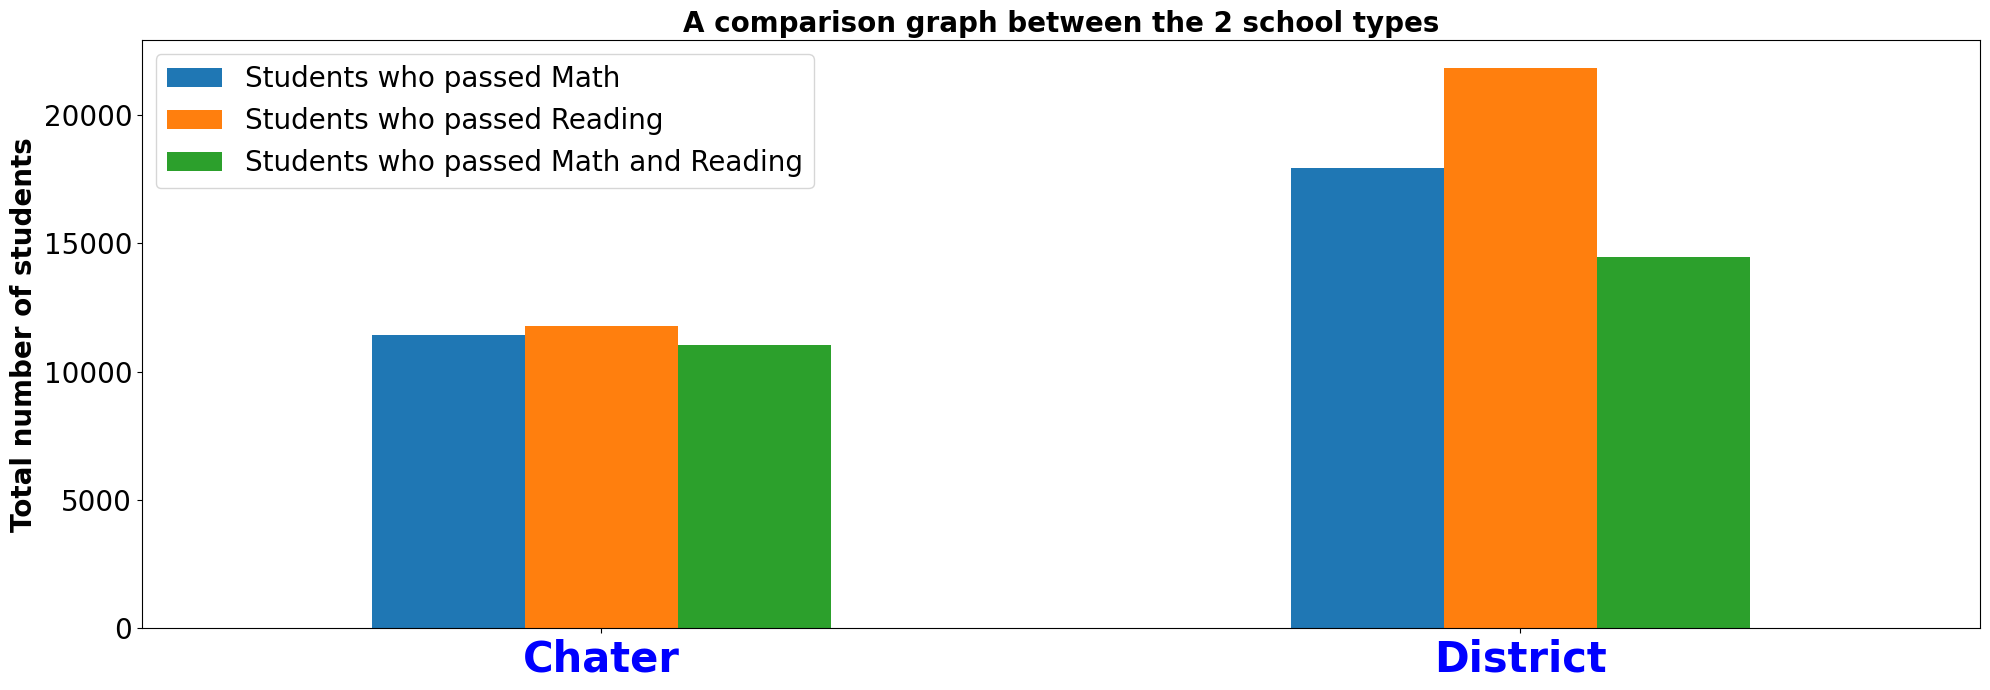

In [188]:
per_school_summary_size_bins_by_district.plot(kind='bar',figsize=(20,7),fontsize=20)
plt.xticks(ticks=per_school_summary_size_bins_by_district.index,labels=['Chater','District'],fontweight='bold',color='b',rotation=0,fontsize=30)
plt.title('A comparison graph between the 2 school types',fontweight='bold',fontsize=20)
plt.ylabel('Total number of students',fontsize=20,fontweight='bold')
plt.legend(loc='best',fontsize=20)
plt.subplots_adjust(right=25)
plt.tight_layout()
plt.show()

In [189]:
per_school_summary_spending_bins_graph = per_school_summary_spending_bins.groupby('Budget bining')\
    ['% Students who passed Math and Reading'].mean().reset_index()
per_school_summary_spending_bins_graph.set_index('Budget bining')

,% Students who passed Math and Reading
Budget bining,
<$585,90.369459
$585-630,81.418596
$630-645,62.857656
$645-680,53.526855


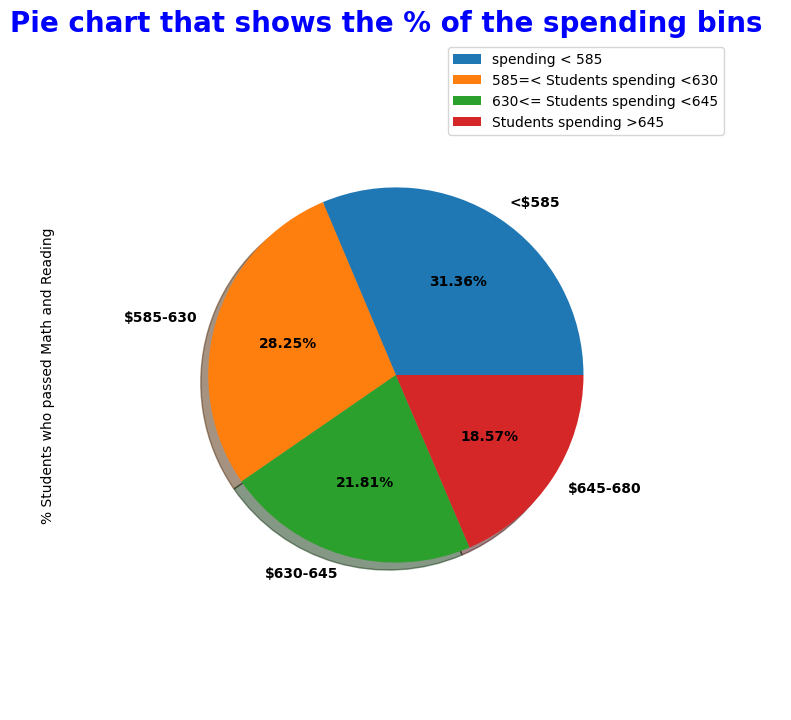

In [219]:
per_school_summary_spending_bins_graph['% Students who passed Math and Reading'].plot(kind='pie',figsize=(3,7),\
                    textprops={'fontweight':'bold'},shadow=True,radius=0.7,autopct='%1.2f%%',subplots=True,\
            labels=[per_school_summary_spending_bins_graph['Budget bining'][x] for x in range(len(per_school_summary_spending_bins_graph.index))])
plt.tight_layout()
plt.legend(['spending < 585','585=< Students spending <630','630<= Students spending <645','Students spending >645'])
plt.title('Pie chart that shows the % of the spending bins  ',fontsize=20,fontweight='bold',color='b')
plt.subplots_adjust(right=10)
plt.show()

